In [133]:
import pandas as pd
import numpy  as np

import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

import imblearn
from imblearn.over_sampling import RandomOverSampler

In [134]:
df = pd.read_csv('../data/processed/spambase.data', sep=',', decimal = '.', header=0)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Train, validation, test datasets

In [135]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

df_shuffeled = df.sample(frac=1).reset_index(drop=True)

train_end = int(0.6 * len(df_shuffeled))
valid_end = int(0.8 * len(df_shuffeled))

train = df_shuffeled.iloc[:train_end]
valid = df_shuffeled.iloc[train_end:valid_end]
test  = df_shuffeled.iloc[valid_end:]

/Users/surkovpavel/projects/ML/spambase/env_3.13/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [136]:
print(len(df[df['spam'] == 1]))
print(len(df[df['spam'] == 0]))

1813
2788


In [137]:
from pandas import DataFrame

def scale_dataset(dataframe: DataFrame, oversample=False):
	X = dataframe[dataframe.columns[:-1]].values
	y = dataframe[dataframe.columns[-1]].values

	scaler = StandardScaler()
	X = scaler.fit_transform(X)

	if oversample:
		ros = RandomOverSampler()
		X, y = ros.fit_resample(X, y)

	data = np.hstack((X, np.reshape(y, (-1, 1))))

	return data, X, y

In [138]:
train, X_train, y_train = scale_dataset(train, True)
valid, X_valid, y_valid = scale_dataset(valid, False)
test, X_test, y_test = scale_dataset(test, False)

## k-nearest neighbours (KNN)

In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [140]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_model.fit(X_train, y_train)
knn_model

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [141]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       558
           1       0.84      0.88      0.86       363

    accuracy                           0.89       921
   macro avg       0.88      0.89      0.88       921
weighted avg       0.89      0.89      0.89       921



## Naive Bayes

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
nb_model

,priors,None
,var_smoothing,1e-09


In [144]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       558
           1       0.71      0.94      0.81       363

    accuracy                           0.82       921
   macro avg       0.83      0.85      0.82       921
weighted avg       0.86      0.82      0.83       921



## Logistic regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
log_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [147]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       558
           1       0.90      0.91      0.91       363

    accuracy                           0.93       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



## SVM

In [148]:
from sklearn.svm import SVC

In [149]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
svm_model

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [150]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



## Neural Net

In [151]:
import tensorflow as tf

In [152]:
def plot_history(history):
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
	ax1.plot(history.history['loss'], label='loss')
	ax1.plot(history.history['val_loss'], label='val_loss')
	ax1.set_xlabel('Epoch')
	ax1.set_ylabel('Binary crossenthropy')
	ax1.grid(True)
	
	ax2.plot(history.history['accuracy'], label='accuracy')
	ax2.plot(history.history['val_accuracy'], label='val_accuracy')
	ax2.set_xlabel('Epoch')
	ax2.set_ylabel('Accuracy')
	ax2.grid(True)

	plt.show()


In [153]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
	nn_model = tf.keras.Sequential([
		tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(57,)), # 57 features train data
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(num_nodes, activation='relu'),
		tf.keras.layers.Dropout(dropout_prob),
		tf.keras.layers.Dense(1, activation='sigmoid')
	])

	nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

	history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

	return nn_model, history

32 nodes, dropout 0.2, lr 0.005, batch 64
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.9446 - loss: 0.3931
32 nodes, dropout 0.2, lr 0.005, batch 128
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.9457 - loss: 0.3704
32 nodes, dropout 0.2, lr 0.001, batch 64
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.9370 - loss: 0.2571
32 nodes, dropout 0.2, lr 0.001, batch 128
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.9478 - loss: 0.2066
64 nodes, dropout 0.2, lr 0.005, batch 64
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.9467 - loss: 0.5894
64 nodes, dropout 0.2, lr 0.005, batch 128
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9413 - loss: 0.4081
64 nodes, dropout 0.2, lr 0.001, batch 64
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9435 - loss: 0.2785
64 nodes, dropout 0.2, lr 0.001, batch 128
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9435 - loss: 0.2589


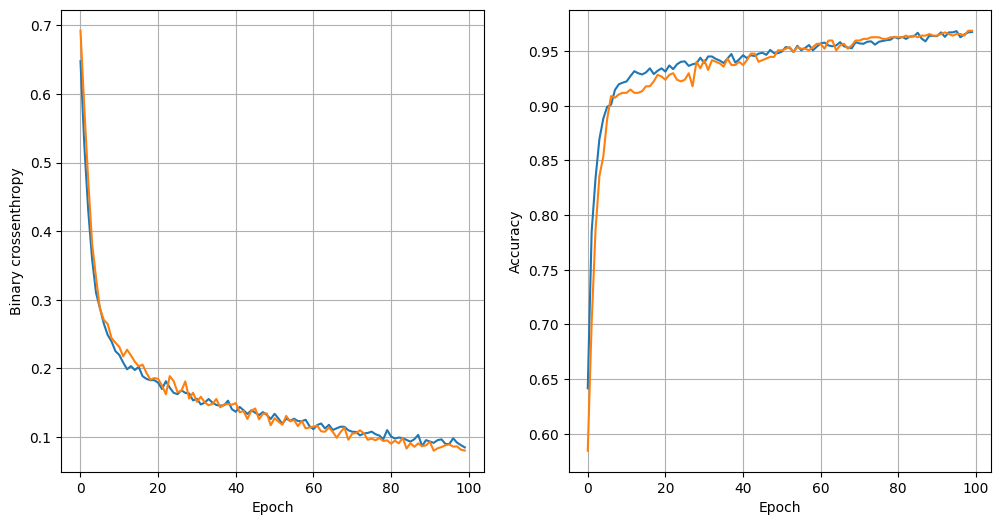

In [155]:
least_val_loss = float('inf')
least_loss_model = None
least_loss_history = None

epochs = 100
dropout_prob = 0.2
for num_nodes in [32, 64]:
	for lr in [0.005, 0.001]:
		for batch_size in [64, 128]:
			print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch {batch_size}")
			model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
			val_loss = model.evaluate(X_valid, y_valid)[0]

			if val_loss < least_val_loss: 
				least_val_loss = val_loss
				least_loss_model = model
				least_loss_history = history

plot_history(least_loss_history)

In [156]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       558
           1       0.93      0.92      0.92       363

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921

